In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Nadam, Adam, Adagrad
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset
#data from here https://github.com/jbrownlee/Datasets/blob/master/wheat-seeds.csv
drive.mount("/content/gdrive")
main_path = "/content/gdrive/MyDrive//ties4911/task2/Automobile_price_data_Raw_set.csv"

Mounted at /content/gdrive


In [3]:
df = read_csv(main_path, header=None)
dataset = pd.read_csv(main_path)
dataset = dataset[['make', 'body-style', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg', 'price']]
dataset = dataset.dropna()
input_data = [['unknown', 'sedan', 103.5, 164, 121, 4250, 25, 24565], ['unknown', 'hatchback', 86.6, 92, 58, 4800, 54, 6479]]
input_dataset = pd.DataFrame(input_data, columns=['make','body-style', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg', 'price'])
combined_dataset = pd.concat([dataset, input_dataset], ignore_index=True)
combined_dataset = pd.get_dummies(combined_dataset, columns=['body-style'])
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(dataset['make'])
num_classes = len(np.unique(encoded_y))
y = to_categorical(encoded_y, num_classes=num_classes)
x = combined_dataset.drop('make', axis=1)
scaler_x = StandardScaler()
scaler_x.fit(x)
x = scaler_x.transform(x)
inputs = x[194:196, :]
x = x[0:194, :]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

n_features = x_train.shape[1]

Epoch 1/150
5/5 [==============================] - 3s 81ms/step - loss: 3.0323 - accuracy: 0.1259 - val_loss: 3.0143 - val_accuracy: 0.1356
Epoch 2/150
5/5 [==============================] - 0s 14ms/step - loss: 2.9843 - accuracy: 0.1704 - val_loss: 2.9914 - val_accuracy: 0.1356
Epoch 3/150
5/5 [==============================] - 0s 14ms/step - loss: 2.9402 - accuracy: 0.1704 - val_loss: 2.9588 - val_accuracy: 0.1356
Epoch 4/150
5/5 [==============================] - 0s 17ms/step - loss: 2.8889 - accuracy: 0.1704 - val_loss: 2.9402 - val_accuracy: 0.1356
Epoch 5/150
5/5 [==============================] - 0s 16ms/step - loss: 2.8324 - accuracy: 0.1704 - val_loss: 2.9225 - val_accuracy: 0.1356
Epoch 6/150
5/5 [==============================] - 0s 13ms/step - loss: 2.7786 - accuracy: 0.1704 - val_loss: 2.9115 - val_accuracy: 0.1356
Epoch 7/150
5/5 [==============================] - 0s 13ms/step - loss: 2.7508 - accuracy: 0.1704 - val_loss: 2.9114 - val_accuracy: 0.1525
Epoch 8/150
5/5 [===

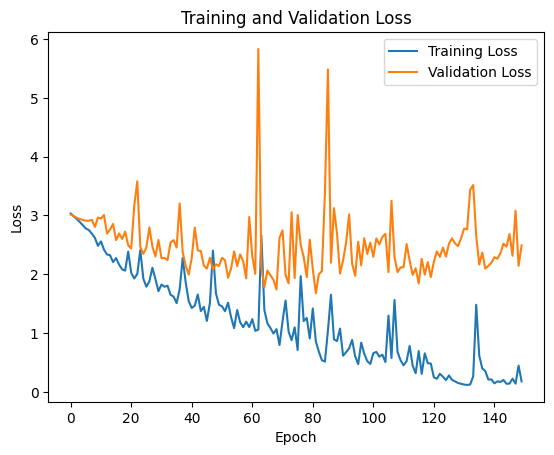

In [4]:
#define model

model = Sequential()
model.add(Dense(2048, activation='relu',
input_shape=(n_features,)))
#model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu' ))
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# compile the model
model.compile(optimizer=Adagrad(learning_rate=0.05),
loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
#history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))
history = model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(x_test, y_test))
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()